# GEOG5990M_Final_Project

## Discussion on the Relationship Between House Prices and Crime case number in the Leeds Area

Student ID number:201749866

## Data Description
Since our topic is "Discussion on the Relationship between Housing Prices and the Number of Criminal Cases in the Leeds Area," we have chosen data on changes in median housing prices across various regions in the UK over the years (Office for National Statistics, 2024) and crime data for the West Yorkshire area (UK Police, 2024) as our primary data sources. Due to the different numbering formats used by these datasets (OA, LSOA), we have also utilized a dictionary of UK regional codes (Office for National Statistics, 2023) to standardize the numbering format (OA). In the visualization section, we will also use map data of Leeds (GeoPackage, 2024) for spatial plot rendering.

Reference
Office for National Statistics (2024) Median price paid by lower layer super output area (HPSA), dataset 46. [online] Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbylowerlayersuperoutputareahpssadataset46 [Accessed 23 May 2024].

UK Police (2024) Police data. [online] Available at: https://data.police.uk/data/ [Accessed 23 May 2024].

Office for National Statistics (2023) Postcode to OA 2021 to LSOA to MSOA to LAD November 2023 Best Fit Lookup in the UK. [online] Available at: https://geoportal.statistics.gov.uk/datasets/ons::postcode-to-oa-2021-to-lsoa-to-msoa-to-lad-november-2023-best-fit-lookup-in-the-uk/about [Accessed 23 May 2024].

GeoPackage (2024) GeoPackage. [online] Available at: https://www.geopackage.org/ [Accessed 23 May 2024].


## load data and data process

In [13]:
import pandas as pd

# Read the LSOA_OA file (used for code lookup) and the West Yorkshire crime data file
house_price_by_LSOA_data = pd.read_excel('house price by LSOA.xls', sheet_name='1a', skiprows=5)
file_crime = pd.read_csv('2023_crime_data_west_yorkshire.csv', encoding='ISO-8859-1')

# Read the UK area code dictionary
file_LSOA_to_OA = pd.read_csv('PCD_OA21_LSOA21_MSOA21_LAD_MAY23_UK_LU.csv', encoding='ISO-8859-1')

# Create a mapping dictionary from LSOA code to OA code to get the OA number of the crime location
lsoa_to_oa = dict(zip(file_LSOA_to_OA['lsoa21cd'], file_LSOA_to_OA['oa21cd']))

# Define a function that returns the corresponding OA code based on the LSOA code
def get_oa_code(lsoa_code):
    return lsoa_to_oa.get(lsoa_code, '')

# Generate a new column 'OA code'
file_crime['OA code'] = file_crime['LSOA code'].apply(get_oa_code)

# Rename crime data
crime_data_2023 = file_crime.copy()

C:\Users\Oppih\AppData\Local\Temp\ipykernel_131264\217018521.py:8: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  file_LSOA_to_OA = pd.read_csv('PCD_OA21_LSOA21_MSOA21_LAD_MAY23_UK_LU.csv', encoding='ISO-8859-1')


In [14]:
import pandas as pd

# Assign to df for subsequent operations
df = house_price_by_LSOA_data

# Keep only the required columns
columns_to_keep = [
    'Local authority code', 'Local authority name', 'LSOA code', 'LSOA name',
    'Year ending Mar 2020', 'Year ending Jun 2020', 'Year ending Sep 2020', 'Year ending Dec 2020',
    'Year ending Mar 2021', 'Year ending Jun 2021', 'Year ending Sep 2021', 'Year ending Dec 2021',
    'Year ending Mar 2022', 'Year ending Jun 2022', 'Year ending Sep 2022', 'Year ending Dec 2022',
    'Year ending Mar 2023'
]
df_filtered = df[columns_to_keep]

# Convert invalid entries to NaN
price_columns = [
    'Year ending Mar 2020', 'Year ending Jun 2020', 'Year ending Sep 2020', 'Year ending Dec 2020',
    'Year ending Mar 2021', 'Year ending Jun 2021', 'Year ending Sep 2021', 'Year ending Dec 2021',
    'Year ending Mar 2022', 'Year ending Jun 2022', 'Year ending Sep 2022', 'Year ending Dec 2022',
    'Year ending Mar 2023'
]
df_filtered[price_columns] = df_filtered[price_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values
df_filtered = df_filtered.dropna()

# Convert the price_columns to integers
df_filtered[price_columns] = df_filtered[price_columns].astype(int)

# Calculate the average house price from 2020 to 2023
df_filtered['average_price'] = df_filtered[price_columns].mean(axis=1)
df_filtered['OA code'] = df_filtered['LSOA code'].apply(get_oa_code)
average_house_price_2020_2023 = df_filtered.copy()

# Check the data
print(df_filtered['average_price'])

0         93500.000000
1         39697.461538
2         52961.153846
5        124236.461538
6         80230.692308
             ...      
34747    221346.153846
34748    141632.692308
34749    103846.153846
34750    105307.692308
34751    133115.384615
Name: average_price, Length: 32029, dtype: float64


C:\Users\Oppih\AppData\Local\Temp\ipykernel_131264\1158809216.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[price_columns] = df_filtered[price_columns].apply(pd.to_numeric, errors='coerce')


In [15]:
# Group by OA code and count the number of crime IDs and the number of each Crime type for each OA code
crime_counts = crime_data_2023.groupby(['OA code', 'Crime type']).size().unstack(fill_value=0)

# Count the total number of crimes for each OA code
crime_counts['total_crime'] = crime_counts.sum(axis=1)

# Move the total_crime column to the first column
crime_counts = crime_counts.reset_index().set_index('OA code')
cols = crime_counts.columns.tolist()
cols = cols[-1:] + cols[:-1]
crime_counts = crime_counts[cols]

# Set the index as the first column
crime_number_by_OA = crime_counts.reset_index().copy()

# Check the data
print(crime_number_by_OA)
crime_number_by_OA.describe()

Crime type    OA code  total_crime  Anti-social behaviour  Bicycle theft  \
0                             5026                    390             60   
1           E00027413            1                      0              0   
2           E00028121            1                      0              0   
3           E00037143            4                      1              0   
4           E00037305            1                      0              0   
...               ...          ...                    ...            ...   
1426        E00187107           79                      5              0   
1427        E00187130          223                     28              2   
1428        E00187137         8198                    398            176   
1429        E00187142          339                     34              3   
1430        E00187147          120                     12              1   

Crime type  Burglary  Criminal damage and arson  Drugs  Other crime  \
0               

Crime type,total_crime,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000
mean,229.292103,18.884696,1.406709,11.053809,18.220126,6.122292,6.058001,15.090846,1.766597,24.229909,2.238295,15.429769,2.220126,11.885395,94.685535
std,329.157415,24.048901,5.675324,13.533508,18.791042,14.560402,6.483556,27.569470,3.298447,38.879564,7.556303,74.115836,15.933333,12.162685,103.295112
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,7.000000,0.000000,5.000000,7.000000,1.000000,2.000000,5.000000,0.000000,9.000000,0.000000,0.000000,0.000000,5.000000,41.000000
50%,174.000000,13.000000,0.000000,9.000000,14.000000,3.000000,5.000000,10.000000,1.000000,17.000000,1.000000,1.000000,1.000000,9.000000,75.000000
75%,283.500000,23.000000,1.000000,14.000000,24.000000,6.000000,8.000000,17.000000,2.000000,29.000000,2.000000,6.000000,2.000000,15.000000,126.000000
max,8198.000000,398.000000,176.000000,287.000000,318.000000,219.000000,104.000000,709.000000,57.000000,817.000000,212.000000,2099.000000,508.000000,224.000000,2129.000000


## Non-spatial visualisation

In [16]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import contextily as ctx
import seaborn as sns
import geoplot as gplt
import geoplot.crs as gcrs

# Rename the dataframe
crime_data = crime_number_by_OA.copy()

# Check the column names
print(crime_data.columns)

# Read CSV file B into a DataFrame
price_data = average_house_price_2020_2023.copy()

# Create a dictionary from file B for OA code and average_price
oa_price_dict = dict(zip(price_data['OA code'], price_data['average_price']))

# Map the average_price to the crime_data DataFrame
crime_data['average_house_price'] = crime_data['OA code'].map(oa_price_dict)


Index(['OA code', 'total_crime', 'Anti-social behaviour', 'Bicycle theft',
       'Burglary', 'Criminal damage and arson', 'Drugs', 'Other crime',
       'Other theft', 'Possession of weapons', 'Public order', 'Robbery',
       'Shoplifting', 'Theft from the person', 'Vehicle crime',
       'Violence and sexual offences'],
      dtype='object', name='Crime type')


In [17]:
# Read map data
oa_leeds = gpd.read_file('oa_leeds.gpkg')
map_leeds = gpd.read_file('map_leeds.gpkg')
crime_house_price_data = crime_data

# Set to British National Coordinate System
leeds_oa_data = oa_leeds.to_crs(epsg=27700)
leeds_map_data = map_leeds.to_crs(epsg=27700)

# Filter the crime_house_price_data to include only data belonging to the Leeds area using the OA_SA column from leeds_oa_data
filtered_data = crime_house_price_data[crime_house_price_data['OA code'].isin(leeds_oa_data['OA_SA'])]

# Generate a new DataFrame leeds_crime_house_data
leeds_crime_house_data = filtered_data.copy()

# Check data
leeds_crime_house_data.head()

Crime type,OA code,total_crime,Anti-social behaviour,Bicycle theft,Burglary,Criminal damage and arson,Drugs,Other crime,Other theft,Possession of weapons,Public order,Robbery,Shoplifting,Theft from the person,Vehicle crime,Violence and sexual offences,average_house_price
648,E00056751,59,16,0,4,4,0,2,4,0,2,0,1,0,6,20,258711.538462
649,E00056754,79,4,0,3,8,3,3,10,2,6,1,0,0,11,28,243581.153846
650,E00056755,243,31,0,6,23,3,3,18,2,23,1,36,2,12,83,180145.538462
651,E00056762,71,5,0,3,7,0,2,8,0,5,0,3,0,3,35,293184.615385
652,E00056770,75,4,1,3,3,2,7,3,0,11,0,0,0,7,34,232384.615385


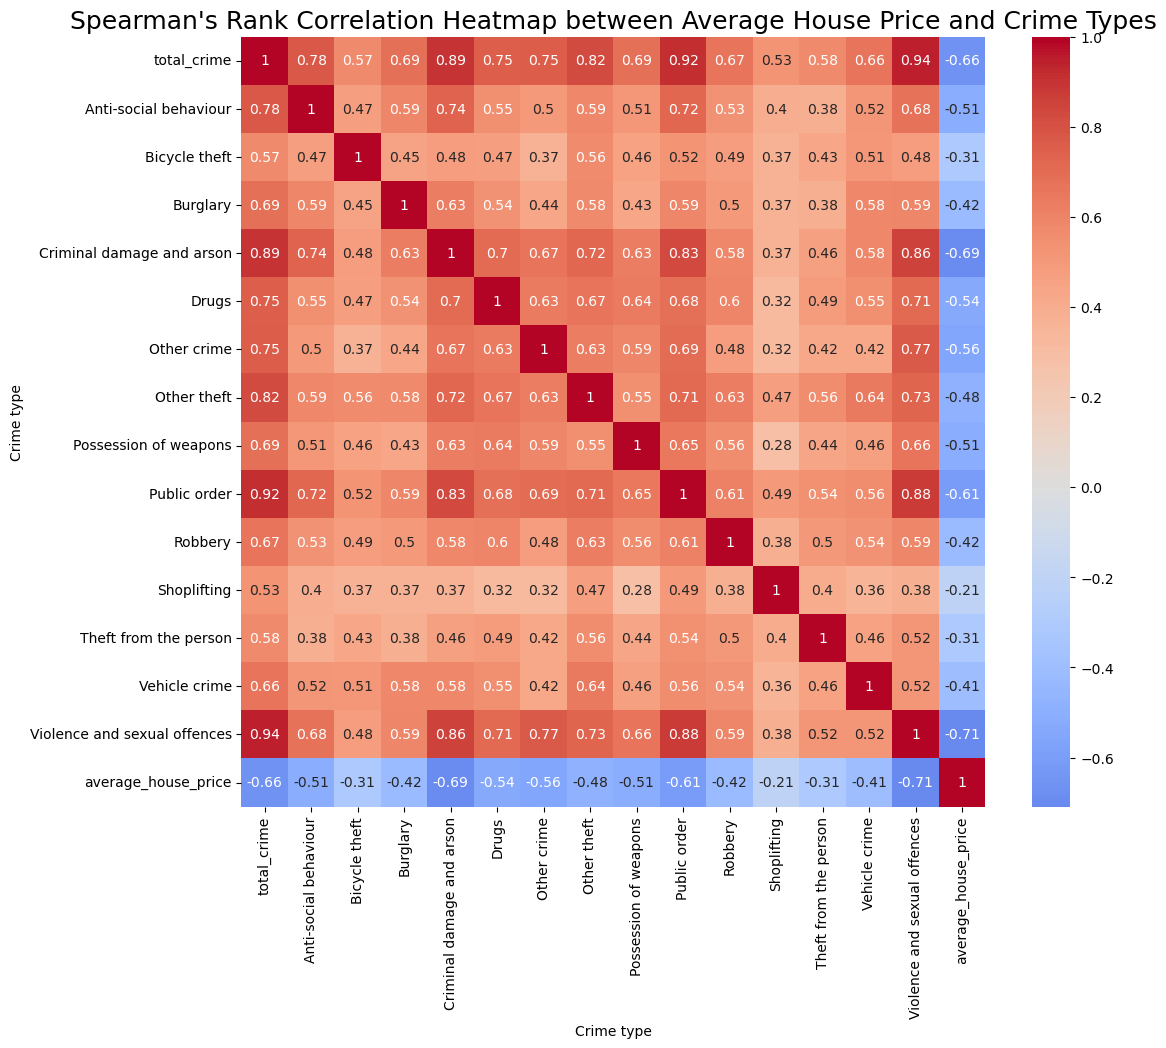

In [18]:
# Select columns for correlation analysis
columns_of_interest = ['total_crime', 'Anti-social behaviour', 'Bicycle theft', 'Burglary',
                       'Criminal damage and arson', 'Drugs', 'Other crime', 'Other theft', 
                       'Possession of weapons', 'Public order', 'Robbery', 'Shoplifting',
                       'Theft from the person', 'Vehicle crime', 'Violence and sexual offences',
                       'average_house_price']

# Perform Spearman's Rank correlation analysis
correlation_matrix = leeds_crime_house_data[columns_of_interest].corr(method='spearman')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Spearman's Rank Correlation Heatmap between Average House Price and Crime Types", fontsize=18)
plt.show()

Data:  
Our two primary data sources are the median housing prices across various regions in the UK over the years (Office for National Statistics, 2024) and crime data for the West Yorkshire area (UK Police, 2024).

Objective:  
In the Leeds area, we study the relationship between housing prices and the number of different types of crimes, and explore potential factors influencing housing prices.

Data (Feature) Selection:  
The housing price data provides median prices from 1995 to 2023, while the crime data includes information for the West Yorkshire area from 2020 to 2023. To control variables, we extracted median housing price data and crime data from 2020 to 2023. The crime data describes the location of each case and its crime type. Therefore, we can determine the total number of crime cases and the number of each crime type in different areas. We then use Spearman's Rank to calculate the correlation matrix between housing prices and the number of different types of crimes.

Visualization Choice:  
We chose the classic heatmap (Waskom, 2024) to visualize the correlation matrix between housing prices (median average) and the number of different types of crimes. The heatmap allows us to intuitively understand the relationship between features through color and value, with darker colors and larger values indicating stronger correlations. Red represents a positive correlation, while blue represents a negative correlation. Therefore, we can clearly see that housing prices are negatively correlated with all types of crime numbers, especially with the "violence and sexual offences" type, followed by "criminal damage and arson" crimes.

Reference  
Office for National Statistics (2024) Median price paid by lower layer super output area (HPSA), dataset 46. [online] Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbylowerlayersuperoutputareahpssadataset46 [Accessed 23 May 2024].

UK Police (2024) Police data. [online] Available at: https://data.police.uk/data/ [Accessed 23 May 2024].

Waskom, M. (2024). seaborn: statistical data visualization. [Software]. Available at: https://seaborn.pydata.org/ [Accessed 23 May 2024].

## Spatial visualisation

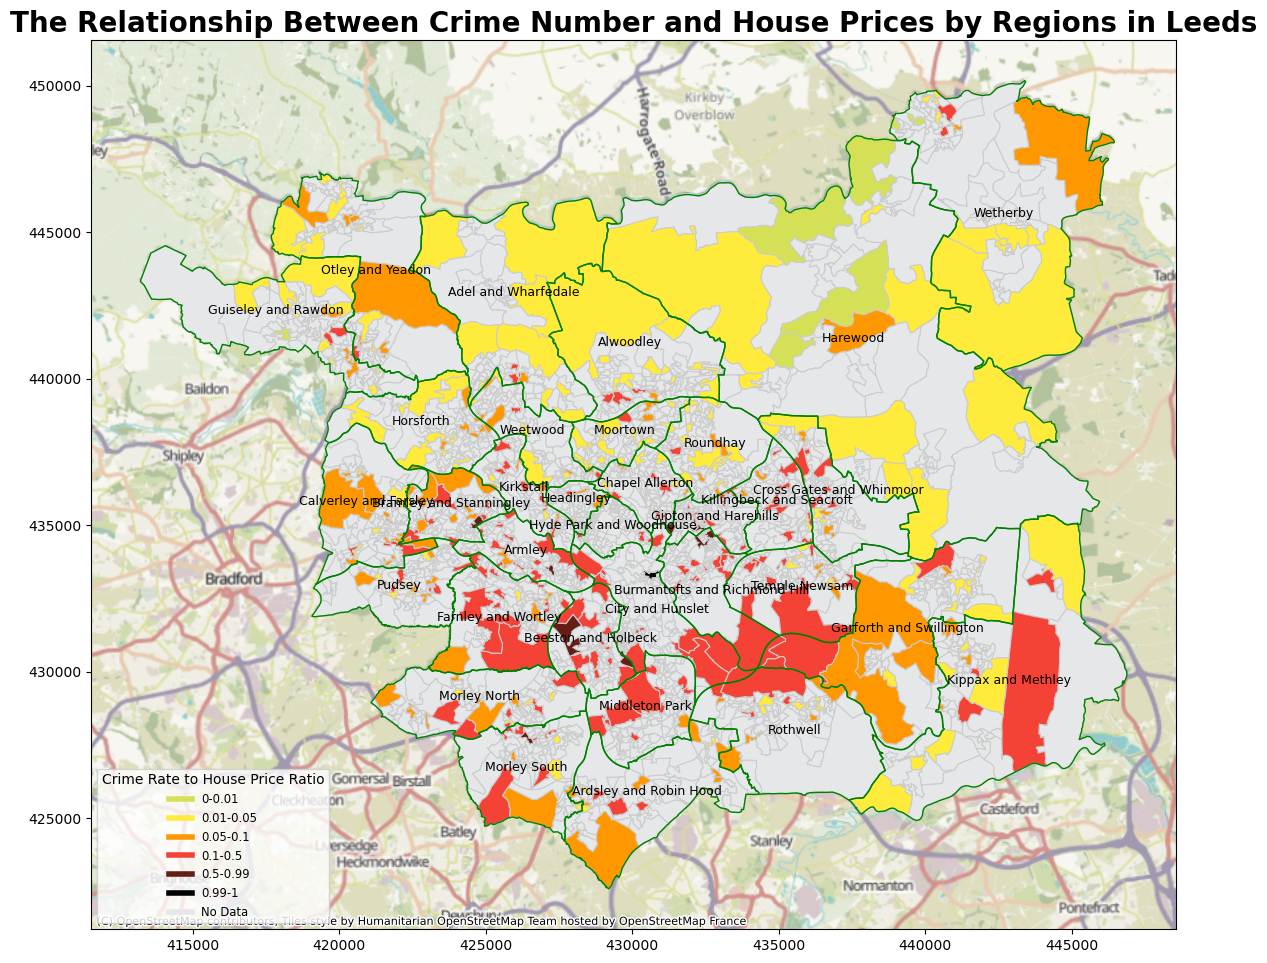

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Define the scaler function
scaler = MinMaxScaler()

# Merge geographical and numerical data
leeds_map_crime_house = pd.merge(leeds_oa_data, crime_house_price_data, left_on='OA_SA', right_on='OA code', how='left')

# Calculate the ratio of crime number to house price, and normalize for comparison
leeds_map_crime_house['rate_crime_house'] = (leeds_map_crime_house['total_crime'] / leeds_map_crime_house['average_house_price']) * 100

# Normalize non-NaN values, then put NaN values back
non_nan_values = leeds_map_crime_house['rate_crime_house'].dropna().values.reshape(-1, 1)
scaled_values = scaler.fit_transform(non_nan_values)
leeds_map_crime_house.loc[leeds_map_crime_house['rate_crime_house'].notna(), 'rate_crime_house_normalized'] = scaled_values.flatten()

# Define bins
bins = [0, 0.01, 0.05, 0.1, 0.5, 1, float('inf')]
labels = ['0-0.01', '0.01-0.05', '0.05-0.1', '0.1-0.5', '0.5-0.99', '0.99-1']
colors = {
    '0-0.01': '#d4e157',    # Light Green
    '0.01-0.05': '#ffeb3b',  # Yellow
    '0.05-0.1': '#ff9800',   # Orange
    '0.1-0.5': '#f44336',    # Red
    '0.5-0.99': '#641E16',   # Dark Red
    '0.99-1': 'black'        # Black
}

# Categorize the data based on total_crime values
leeds_map_crime_house['rate_category'] = pd.cut(leeds_map_crime_house['rate_crime_house'], bins=bins, labels=labels, include_lowest=True)

# Convert leeds_map_crime_house to GeoDataFrame
leeds_map_crime_house_gdf = gpd.GeoDataFrame(leeds_map_crime_house, geometry='geometry')

# Create the plot canvas
f, ax = plt.subplots(1, figsize=(14, 14))

# Plot boundaries
leeds_map_data.boundary.plot(ax=ax, color='green', linewidth=1, zorder=2)

# Plot areas with no values
leeds_map_crime_house_gdf[leeds_map_crime_house_gdf['rate_crime_house'].isna()].plot(ax=ax, color='#E5E7E9', linewidth=0.8, edgecolor='0.8')

# Plot areas with values, color changes according to crime_category
for category, color in colors.items():
    subset = leeds_map_crime_house_gdf[leeds_map_crime_house_gdf['rate_category'] == category]
    subset.plot(ax=ax, color=color, label=category, linewidth=0.8, edgecolor='0.8')

# Add area names
for idx, row in leeds_map_data.iterrows():
    centroid = row['geometry'].centroid
    ax.text(centroid.x, centroid.y, row['name'], ha='center', fontsize=9)

# Add background map
ctx.add_basemap(ax, crs=leeds_map_data.crs.to_string(), zorder=0)

# Set the title
plt.title('The Relationship Between Crime Number and House Prices by Regions in Leeds', fontsize=20, fontweight='bold')

# Add legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
labels = colors.keys()
handles.append(plt.Line2D([0], [0], color='#E5E7E9', lw=4))  # Add white legend
labels = list(colors.keys()) + ['No Data']
ax.legend(handles=handles, labels=labels, title='Crime Rate to House Price Ratio', loc='lower left', fontsize='small',)

plt.show()


Data:  
Our numerical data comprises the median house prices across various regions in the UK over the years (Office for National Statistics, 2024), and crime data for the West Yorkshire area (UK Police, 2024). The second part of the data is geographic information, including boundary data for Leeds (GeoPackage, 2024). Each boundary corresponds to its unique OA code, in addition to its name.

Objective:  
In the Leeds area, we study the relationship between crime numbers and house prices by regions and investigate the spatial distribution differences of these values.

Data (Feature) Selection:  
All necessary data has been processed and acquired in the previous steps, including Leeds boundary data, and crime and average house price data for each region. In this section, we only need to calculate the relationship between crime numbers and house prices in different regions. However, due to the significant rate differences caused by population variance across different areas, we use the standardization method from the sklearn library (Scikit-learn Developers, 2023) to normalize the values between 0 and 1, facilitating subsequent visualization. Finally, we classify the values into six types based on their distribution, defining corresponding labels and colors.

Visualization Choice:  
First, we create a canvas and use the map data to draw the Leeds region boundaries. We color the map based on the categorized data, use light gray to fill areas with no data, and add area name labels to the center of each region. We then use the contextily library (Contextily Developers, 2023) to add a satellite map image as the background. After that, we add a title to the image. Finally, we create a legend showing the classified value ranges and their corresponding colors.

Reference  
Office for National Statistics (2024) Median price paid by lower layer super output area (HPSA), dataset 46. [online] Available at: https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/medianpricepaidbylowerlayersuperoutputareahpssadataset46 [Accessed 23 May 2024].

UK Police (2024) Police data. [online] Available at: https://data.police.uk/data/ [Accessed 23 May 2024].

GeoPackage (2024) GeoPackage. [online] Available at: https://www.geopackage.org/ [Accessed 23 May 2024].

Scikit-learn Developers, 2023. Scikit-learn: Machine Learning in Python, v1.1.1. Available at: https://scikit-learn.org/stable/ [Accessed 23 May 2024].

Contextily Developers, 2023. Contextily: Contextual Basemaps for Geospatial Data, v1.2.0. Available at: https://contextily.readthedocs.io/en/latest/ [Accessed 24 May 2024].